In [1]:
#importing the important modules which we are going to use in
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output#to remove previous result from display
%matplotlib inline

In [2]:
data=pd.read_csv('housing.csv')#read our csv file whose name is housing.csv


In [4]:
data.head(10)#take a look on our data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
data.describe()#to know about our datasets

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Here we can easily see that count value for some features is different from others which means that our data contain empty or nan values

In [8]:
data=data.dropna(axis=0)#we just remove the rows which have nan or empty values

In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Now value of count is same for all the columns

In [10]:
target=data['median_house_value']
features=data.drop(['median_house_value','ocean_proximity'],axis=1).copy()#drop given 2 columns and save the copy of rest of columns in features variable
#here we are going to add 1 more line for maximum value normalisation
features=features/features.max()
features=np.array(features)
#features=np.dropna(features,axis=0)

In [11]:
print(target.shape)
print(features.shape)

(20433,)
(20433, 8)


In [12]:
def line_multidim(m,x,c):#eqation of line y=M1X1+M2X2+...+MnXn+c
    return np.dot(m,x.T)+c


In [13]:
#lets check that our line function working or not
m=np.random.randn(1,8)
c=2
a=line_multidim(m,features,c)

In [14]:
a.shape#this proves that our line fuction works fantastically

(1, 20433)

In [15]:
#now we are going to make error function
def error(m,x,c,y):
    return np.mean((line_multidim(m,x,c)-y)**2)

In [16]:
#here we reshape our target variable so that it is easily to perform various matrix operations
target=np.array(target)
print(target.shape)
target=np.reshape(target,[1,len(target)])
print(target.shape)

(20433,)
(1, 20433)


In [17]:
#lets check out our error function
print(error(m,features,c,target))

56117879921.24491


In [18]:
#now we are going to make derivative funtion for slope
def derivative_slope(m,x,c,target):
    return 2*np.mean(np.multiply((line_multidim(m,x,c)-target),x.T),axis=1)
#now we are going to make derative function for intercept
def derivative_inter(m,x,c,y):
    return 2*np.mean(line_multidim(m,x,c)-y)
#now we are going to create accuracy function
def accuracy(error,y):
    return 100-((error/np.mean(y**2))*100)

print((derivative_slope(m,features,c,target)).shape)    

(8,)


## Concept of numpy.multiply

In [19]:
a=[1,2,3]
a=np.array(a)
print(a)

[1 2 3]


In [20]:
b=[1,2,3,4,5,6,7,8,9]
b=np.array(b)
b=np.reshape(b,[3,3])

In [21]:
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [22]:
c=np.multiply(a,b)

In [23]:
print(c)

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


In [24]:
c=np.multiply(b,a)
print(c)

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


## Here we are going to optimize the value of m and c 

In [25]:
#now lets check out our good work
m=np.random.randn(1,8)#randomly initialize value of m with the help of normal distribution
c=random.random()#take any random number as c
alpha=0.1#learning rate
cost=[]
for i in range(0,2000):
    
    cost.append(error(m,features,c,target))#append current error in cost, just to plot and visualize it
    m=m-alpha*(derivative_slope(m,features,c,target)).T#m=m-learning_rate*d(error)/d(m)
    c=c-alpha*derivative_inter(m,features,c,target)#c=c-learning_rate*d(error)/d(c)
    clear_output(True)#just to remove the previous printed output from the display
    print(i,'  Current error-->',error(m,features,c,target),"  ",'Current Accuracy--->', accuracy(error(m,features,c,target),target))

1999   Current error--> 6213444230.810183    Current Accuracy---> 88.92782069315706


Text(0.5,1,'alpha=0.1')

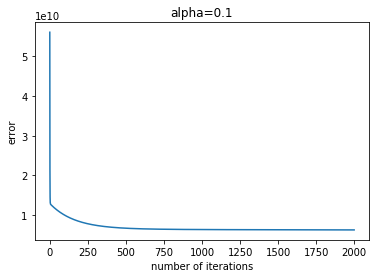

In [26]:
plt.plot(cost)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("alpha=0.1")